<a href="https://colab.research.google.com/github/galib-1206/Image-Processing-Basics/blob/main/image_read.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

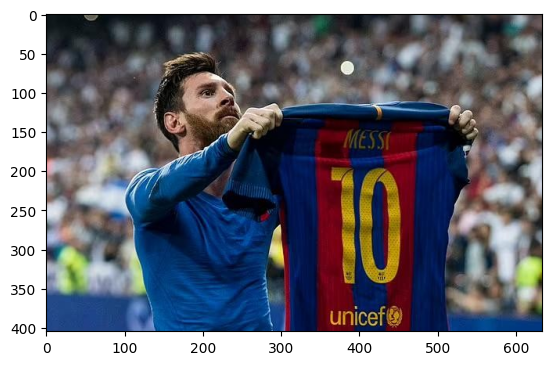

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import csv

# Load the image
image = cv2.imread('/content/drive/MyDrive/Image_pattern & recognition/ankaraaaaaaaaaa.jpg')

# Convert BGR (OpenCV's default) to RGB for proper color rendering in Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)



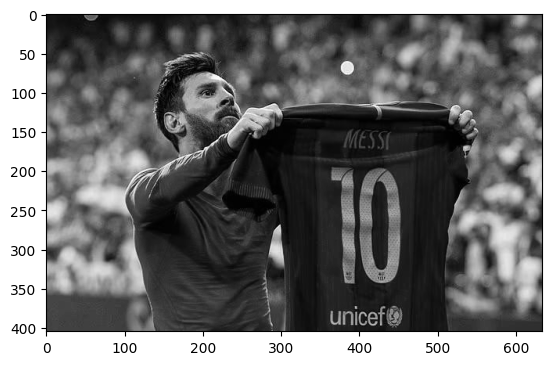

In [ ]:
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Display the grayscale image
plt.imshow(image_gray, cmap='gray')

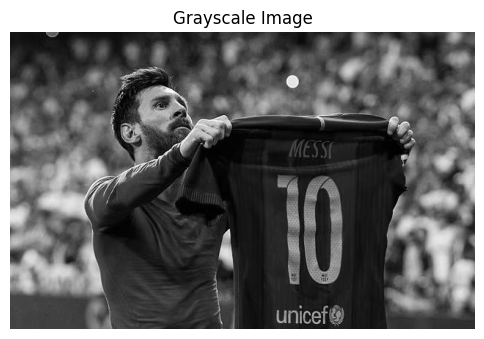

RGB intensity values saved to 'rgb_intensity_values.csv'


In [ ]:
# Display grayscale image using Matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(image_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

# Save RGB intensity values to a CSV file for better organization
with open('rgb_intensity_values.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['R', 'G', 'B'])  # Header row
    for row in image_rgb:
        for pixel in row:
            writer.writerow(pixel)  # Write each RGB value as a row

print("RGB intensity values saved to 'rgb_intensity_values.csv'")

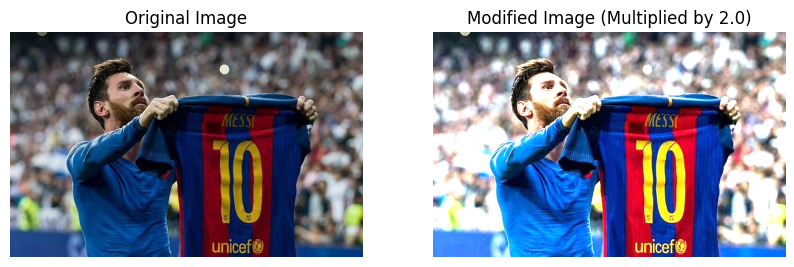

In [ ]:
# Apply a constant multiplier to RGB values
constant_multiplier = 2.0  # Adjust as needed
image_scaled = np.clip(image_rgb * constant_multiplier, 0, 255).astype(np.uint8)

# Display both original and scaled images side by side
plt.figure(figsize=(10, 5))

# Original image display
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Scaled image display
plt.subplot(1, 2, 2)
plt.imshow(image_scaled)
plt.title(f'Modified Image (Multiplied by {constant_multiplier})')
plt.axis('off')

plt.show()

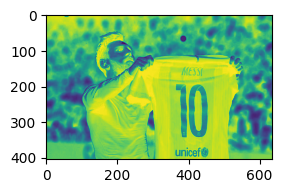

In [ ]:
image_modified = np.clip(255 - image_gray, 0, 255).astype(np.uint8)
plt.subplot(1, 2, 2)
plt.imshow(image_modified)
plt.show()

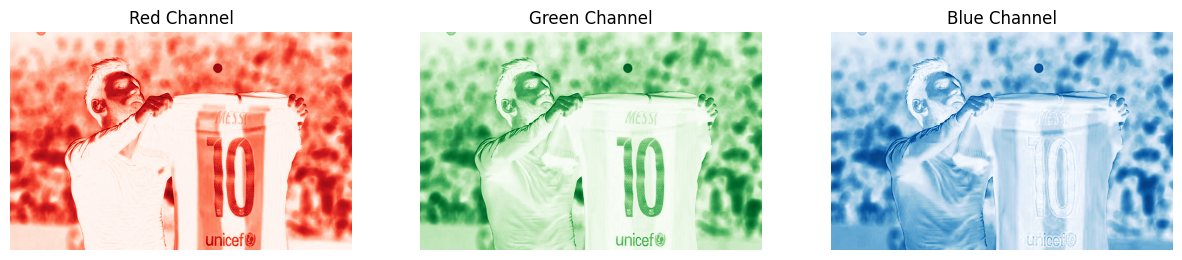

In [ ]:
# Separate the RGB channels
red_channel = image_rgb[:, :, 0]
green_channel = image_rgb[:, :, 1]
blue_channel = image_rgb[:, :, 2]

# Display the individual channels
plt.figure(figsize=(15, 5))

# Red channel display
plt.subplot(1, 3, 1)
plt.imshow(red_channel, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

# Green channel display
plt.subplot(1, 3, 2)
plt.imshow(green_channel, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

# Blue channel display
plt.subplot(1, 3, 3)
plt.imshow(blue_channel, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')

plt.show()

Edge detection with canny operator

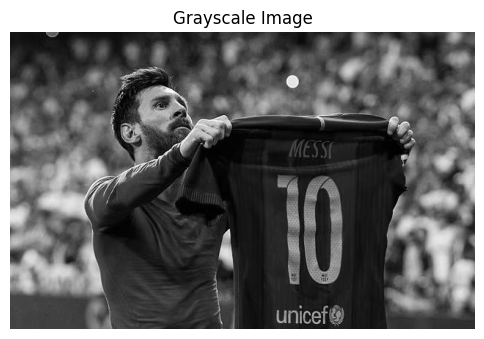

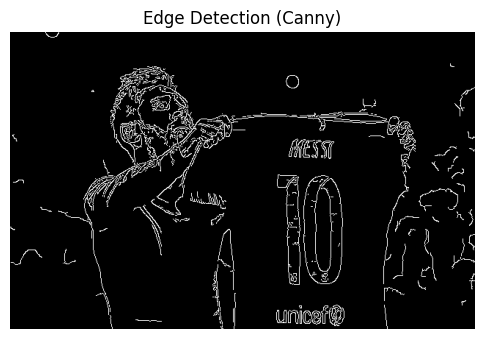

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Display grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(image_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

# Perform Canny edge detection on the grayscale image
edges = cv2.Canny(image_gray, threshold1=100, threshold2=200)

# Display the edge-detected image
plt.figure(figsize=(6, 6))
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection (Canny)')
plt.axis('off')
plt.show()


Edge detection using the Sobel operator

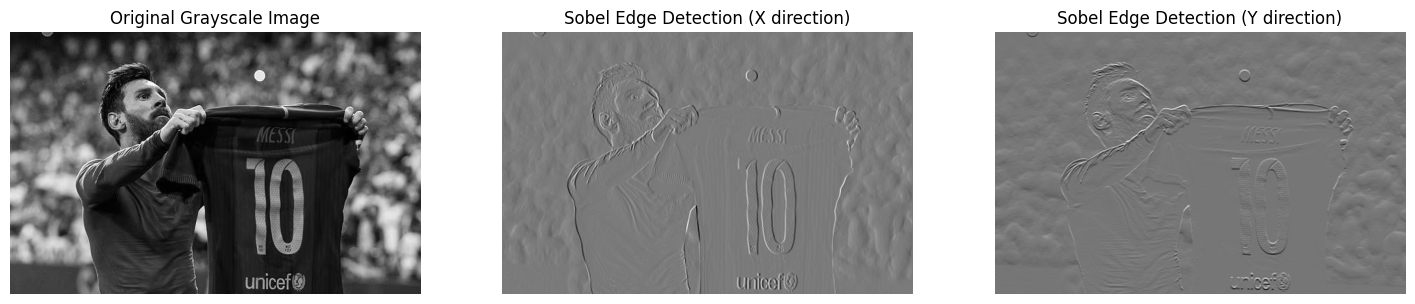

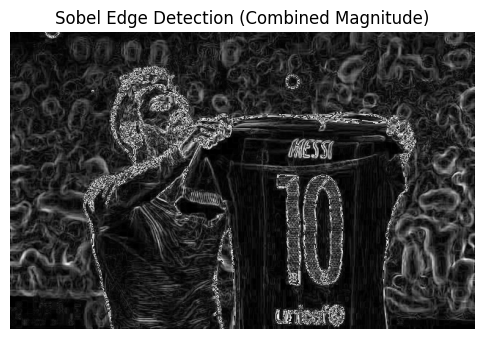

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Compute the Sobel gradient in the x-direction
sobel_x = cv2.Sobel(image_gray, cv2.CV_64F, dx=1, dy=0, ksize=3)  # dx=1, dy=0 for x gradient

# Compute the Sobel gradient in the y-direction
sobel_y = cv2.Sobel(image_gray, cv2.CV_64F, dx=0, dy=1, ksize=3)  # dx=0, dy=1 for y gradient

# Compute the magnitude of the gradient (edge intensity)
sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)

# Convert to uint8 format for display
sobel_magnitude = np.uint8(np.absolute(sobel_magnitude))

# Display the results
plt.figure(figsize=(18, 6))

# Original grayscale image
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Sobel X result
plt.subplot(1, 3, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel Edge Detection (X direction)')
plt.axis('off')

# Sobel Y result
plt.subplot(1, 3, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Edge Detection (Y direction)')
plt.axis('off')

# Overall Edge Magnitude
plt.figure(figsize=(6, 6))
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel Edge Detection (Combined Magnitude)')
plt.axis('off')

plt.show()


**To perform edge detection using the Sobel operator without OpenCV. **

**Convolution:** We use convolve from scipy.ndimage to apply the Sobel kernels to the image. This function slides the kernel over each pixel and calculates a weighted sum to detect intensity changes.

**Gradient Magnitude**: We calculate the magnitude of the gradient at each pixel using
magnitude
=
sobel_x
2
+
sobel_y
2
magnitude=
sobel_x
2
 +sobel_y
2

​
 , combining the x and y gradients to get the final edge intensity.

**Normalization**: The gradient magnitude is normalized to fit within the range of 0-255, suitable for image display.

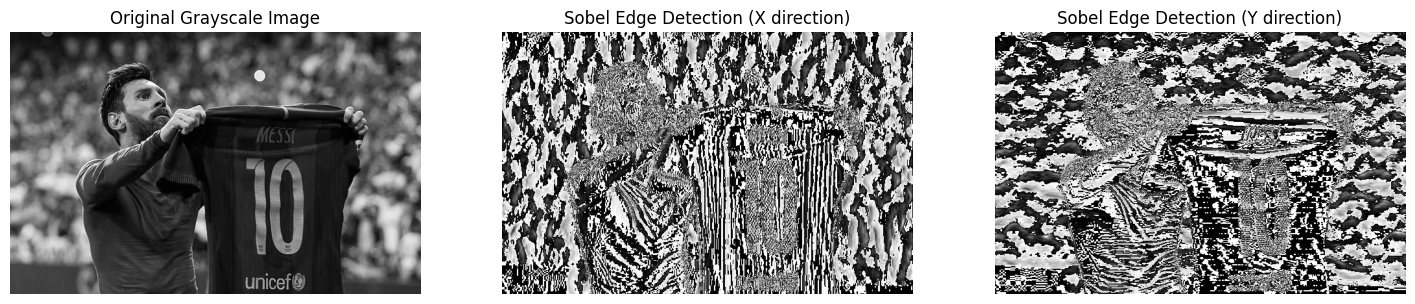

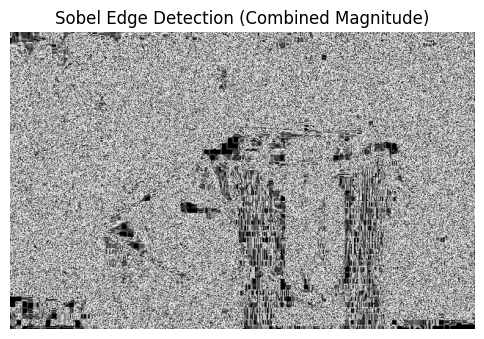

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Assuming 'image_gray' is your grayscale image in a 2D NumPy array

# Define the Sobel kernels
sobel_x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y_kernel = np.array([[ 1, 2, 1], [ 0, 0, 0], [-1, -2, -1]])

# Apply convolution to get gradients
sobel_x = convolve(image_gray, sobel_x_kernel)
sobel_y = convolve(image_gray, sobel_y_kernel)

# Calculate the magnitude of the gradient
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitude = np.uint8(sobel_magnitude / sobel_magnitude.max() * 255)  # Normalize to 0-255

# Display the results
plt.figure(figsize=(18, 6))

# Original grayscale image
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Sobel X result
plt.subplot(1, 3, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel Edge Detection (X direction)')
plt.axis('off')

# Sobel Y result
plt.subplot(1, 3, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Edge Detection (Y direction)')
plt.axis('off')

# Overall Edge Magnitude
plt.figure(figsize=(6, 6))
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel Edge Detection (Combined Magnitude)')
plt.axis('off')

plt.show()


### FInd the edge are in 45 degree and color them yellow

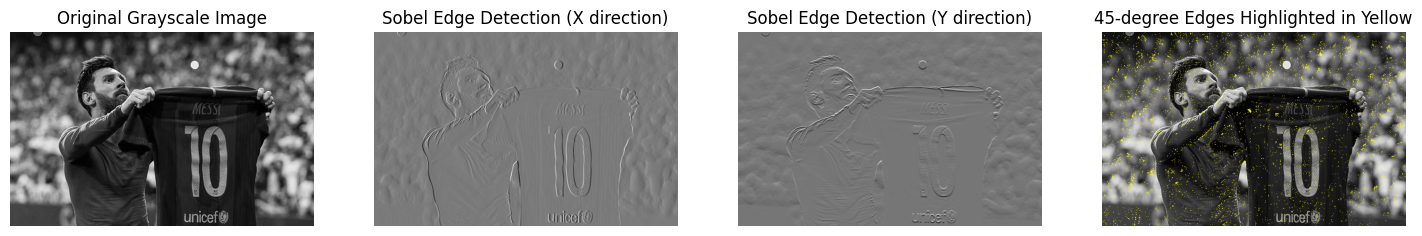

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'image_gray' is your grayscale image

# Compute the Sobel gradient in the x-direction
sobel_x = cv2.Sobel(image_gray, cv2.CV_64F, dx=1, dy=0, ksize=3)  # dx=1, dy=0 for x gradient

# Compute the Sobel gradient in the y-direction
sobel_y = cv2.Sobel(image_gray, cv2.CV_64F, dx=0, dy=1, ksize=3)  # dx=0, dy=1 for y gradient

# Compute the magnitude of the gradient (edge intensity)
sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)

# Convert to uint8 format for display
sobel_magnitude = np.uint8(np.absolute(sobel_magnitude))

# Compute the angle of the gradient
angle = np.arctan2(sobel_y, sobel_x) * (180. / np.pi)  # Convert to degrees

# Create a color image from the grayscale image
color_image = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2BGR)

# Create a mask for 45-degree edges (considering a small range around 45 degrees)
angle_45_mask = (angle >= 40) & (angle <= 50)

# Color the 45-degree edges yellow (BGR format)
color_image[angle_45_mask] = [0, 255, 255]  # Yellow in BGR

# Display the results
plt.figure(figsize=(18, 6))

# Original grayscale image
plt.subplot(1, 4, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Sobel X result
plt.subplot(1, 4, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel Edge Detection (X direction)')
plt.axis('off')

# Sobel Y result
plt.subplot(1, 4, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Edge Detection (Y direction)')
plt.axis('off')

# Color image with 45-degree edges highlighted
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.title('45-degree Edges Highlighted in Yellow')
plt.axis('off')

plt.show()


In [ ]:
# now, continue the same operation for each channel and negate it. and finally merge it.
# Convulation matrix for image blurring.
